<a href="https://colab.research.google.com/github/red1ithink/imaflowman/blob/main/makingvideo_of_vel_vol_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade givernylocal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.6/355.6 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: rpds-py
    Found existing installation: rpds-py 0.20.0
    Uninstalling rpds-py-0.20.0:
      Successfully uninstalled rpds-py-0.20.0
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: jsonschema-specifications
    Found ex

In [ ]:
"""
instantiate dataset
"""
from givernylocal.turbulence_dataset import *
from givernylocal.turbulence_toolkit import *

auth_token = 'edu.jhu.pha.turbulence.testing-201406'
dataset_title = 'isotropic1024fine'
output_path = './giverny_output'

# instantiate the dataset.
dataset = turb_dataset(dataset_title = dataset_title, output_path = output_path, auth_token = auth_token)

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    getData
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> :
    <br>
    &emsp;- retrieve (interpolate and/or differentiate) a group of sparse data points.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>steps</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        step 1 &ensp;: &ensp;identify the database files to be read.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        step 2 &ensp;: &ensp;read the database files and store the interpolated points in an array.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
         dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        points &ensp;: &ensp;array of points in the domain [0, 2pi).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        variable &ensp;: &ensp;type of data (velocity, pressure, energy, temperature, force, magneticfield, vectorpotential, density, position).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        time &ensp;: &ensp;time (snapshot number for datasets without a full time evolution).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        time_end &ensp;: &ensp;ending time for 'position' variable and time series queries.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        delta_t &ensp;: &ensp;time step for 'position' variable and time series queries.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        temporal_method &ensp;: &ensp;temporal interpolation methods.
        <br>
        &emsp;- none &ensp;: &ensp;No temporal interpolation (the value at the closest stored time will be returned).
        <br>
        &emsp;- pchip &ensp;: &ensp;Piecewise Cubic Hermite Interpolation Polynomial method is used, in which the value from the two nearest times<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;is interpolated at time t using Cubic Hermite Interpolation Polynomial, with centered finite difference evaluation of the<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;end-point time derivatives (i.e. a total of four temporal points are used).
        <br>
    </li>
    <li style = "font-weight:bold;font-size:13px">
        spatial_method &ensp;: &ensp;spatial interpolation and differentiation methods.
        <br>
        &emsp;- none &ensp;: &ensp;No spatial interpolation (value at the datapoint closest to each coordinate value).
        <br>
        &emsp;- lag4 &ensp;: &ensp;4th-order Lagrange Polynomial interpolation along each spatial direction.
        <br>
        &emsp;- lag6 &ensp;: &ensp;6th-order Lagrange Polynomial interpolation along each spatial direction.
        <br>
        &emsp;- lag8 &ensp;: &ensp;8th-order Lagrange Polynomial interpolation along each spatial direction.
        <br>
        &emsp;- m1q4 &ensp;: &ensp;Splines with smoothness 1 (3rd order) over 4 data points.
        <br>
        &emsp;- m2q8 &ensp;: &ensp;Splines with smoothness 2 (5th order) over 8 data points.
        <br>
        &emsp;- m2q14 &ensp;: &ensp;Splines with smoothness 2 (5th order) over 14 data points.
        <br>
        &emsp;- fd4noint &ensp;: &ensp;4th-order centered finite differencing (without spatial interpolation).
        <br>
        &emsp;- fd6noint &ensp;: &ensp;6th-order centered finite differencing (without spatial interpolation).
        <br>
        &emsp;- fd8noint &ensp;: &ensp;8th-order centered finite differencing (without spatial interpolation).
        <br>
        &emsp;- fd4lag4 &ensp;: &ensp;4th-order Lagrange Polynomial interpolation in each direction, of the 4th-order finite difference values on the grid.
        <br>
    </li>
    <li style = "font-weight:bold;font-size:13px">
        spatial_operator &ensp;: &ensp;spatial interpolation and differentiation operator.
        <br>
        &emsp;- field &ensp;: &ensp;function evaluation &amp; interpolation.
        <br>
        &emsp;- gradient &ensp;: &ensp;differentiation &amp; interpolation.
        <br>
        &emsp;- hessian &ensp;: &ensp;differentiation &amp; interpolation.
        <br>
        &emsp;- laplacian &ensp;: &ensp;differentiation &amp; interpolation.
        <br>
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        result &ensp;: &ensp;interpolated/differentiated values array.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [ ]:
"""
initialize getData parameters (except time and points)
"""
variable = 'velocity'
temporal_method = 'none'
spatial_method = 'lag8'
spatial_operator = 'field'

"""
example point distributions (2D plane, 3D box, random, time series) are provided below...
""";

In [ ]:
import cv2
import os


nx, nz = 64, 64
n_points = nx * nz

x_points = np.linspace(0.0, 0.4 * np.pi, nx, dtype=np.float64)
y_points = 0.9
z_points = np.linspace(0.0, 0.15 * np.pi, nz, dtype=np.float64)

points = np.zeros((n_points, 3), dtype=np.float64)
for i in range(nx):
    for j in range(nz):
        points[i * nz + j, 0] = x_points[i]
        points[i * nz + j, 1] = y_points
        points[i * nz + j, 2] = z_points[j]

frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

time_range = np.arange(0.0002, 0.02, 0.0002)
for t_index, time in enumerate(time_range):
    result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)
    if nx >= 2 and nz >= 2:
        time_component = 0
        plot_component = 0
        result_time = result[time_component]
        result_array = np.array(result_time)
        data_plot = np.zeros((nx, nz), dtype=np.float32)
        x_plot = np.zeros((nx, nz), dtype=np.float64)
        z_plot = np.zeros((nx, nz), dtype=np.float64)

        for i in range(nx):
            for j in range(nz):
                x_plot[i, j] = x_points[i]
                z_plot[i, j] = z_points[j]
                data_plot[i, j] = result_array[i * nz + j, plot_component]

        fig, ax = plt.subplots(figsize=(7, 7), dpi=67)
        contour = ax.contourf(x_plot, z_plot, data_plot, levels=50, cmap='inferno')
        plt.colorbar(contour)
        plt.xlabel("x")
        plt.ylabel("z")
        plt.title(f"Time = {time:.4f}")
        plt.gca().set_aspect('equal', adjustable='box')

        frame_path = f"{frames_dir}/frame_{t_index:03}.png"
        plt.savefig(frame_path)
        plt.close()

frame_files = sorted([f"{frames_dir}/{file}" for file in os.listdir(frames_dir) if file.endswith(".png")])
first_frame = cv2.imread(frame_files[0])
height, width, _ = first_frame.shape
video = cv2.VideoWriter("fluid_velocity_video.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 10, (width, height))

for frame_file in frame_files:
    frame = cv2.imread(frame_file)
    video.write(frame)

video.release()


In [24]:
# prompt: result_time DataFrame 사용: 2-d graph

import altair as alt

# Create a scatter plot
alt.Chart(result_time).mark_circle().encode(
    x='ux',
    y='uy'
)


alt.Chart(...)

In [10]:
"""
3D box demo points : evenly spaced over a 3D volume
    - time : the time to be queried (snapshot number for datasets without a full time evolution).
    - nx,ny,nz : number of points along each axis. total number of points queried will be n_points= nx * ny * nz.
    - x_points, y_points, z_points : point distributions along each axis, evenly spaced over the specified ranges.
        - np.linspace(axis minimum, axis maximum, number of points).
    - points : the points array evenly spaced out over the 3D volume.
        - points array is instantiated as an empty array that will be filled inside the for loops.
"""
time = 0.002

nx = 16
ny = 16
nz = 16
n_points = nx * ny * nz

x_points = np.linspace(3.0, 3.3, nx, dtype = np.float64)
y_points = np.linspace(-0.9, -0.6, ny, dtype = np.float64)
z_points = np.linspace(0.2, 0.5, nz, dtype = np.float64)

points = np.zeros((n_points, 3), dtype = np.float64)
for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            points[i * ny * nz + j * nz + k, 0] = x_points[i]
            points[i * ny * nz + j * nz + k, 1] = y_points[j]
            points[i * ny * nz + j * nz + k, 2] = z_points[k]

"""
use the tools and processing gizmos.
"""
# process interpolation/differentiation of points.
result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)

"""
display sample results on screen.
"""
# set threshold for the number of numpy array elements to display.
np.set_printoptions(threshold = 10)

print(f'num points = {len(points)}')
print(f'\npoints = \n-\n{points}')
# the 1st time index of result corresponds to the final time for the "position" variable and the initial time for all other variables.
print(f'\nresult (1st time index) = \n-\n{result[0]}\n')

"""
with result, generate a 2D contour plot.
    - a simple plot to quickly visualize the queried 3D volume on a sample plane at y.
""";
if nx >= 2 and ny >= 2 and nz >= 2:
    # user-defined plot parameters.
    # which time of the data to plot (0-based index, so the first time component is specified as 0).
    time_component = 0
    # which component (column) of the data to plot (0-based index, so the first component is specified as 0).
    plot_component = 0

    # reformat 'result' for plotting.
    result_time = result[time_component]
    result_array = np.array(result_time)
    data_plot = np.zeros((nx, ny, nz, len(result_time.columns)), dtype = np.float32)
    x_plot = np.zeros((nx, ny, nz), dtype = np.float64)
    y_plot = np.zeros((nx, ny, nz), dtype = np.float64)
    z_plot = np.zeros((nx, ny, nz), dtype = np.float64)

    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                x_plot[i, j, k] = x_points[i]
                y_plot[i, j, k] = y_points[j]
                z_plot[i, j, k] = z_points[k]
                data_plot[i, j, k, :] = result_array[i * ny * nz + j * nz + k, :]

    # plot the data.
    fig = go.Figure(
        data = go.Volume(
            x = x_plot.flatten(), y = y_plot.flatten(), z = z_plot.flatten(),
            value = data_plot[:, :, :, plot_component].flatten(),
            isomin = data_plot[:, :, :, plot_component].min(),
            isomax = data_plot[:, :, :, plot_component].max(),
            opacity = 0.2, surface_count = 17, colorscale = 'inferno',
            colorbar = dict(
                title = dict(text = f'{variable} {spatial_operator}', side = 'right', font = dict(size = 14)),
                thickness = 15, len = 0.75,
                x = 1.05, y = 0.5, xanchor = 'left', yanchor = 'middle'),
            hovertemplate =
                '<i>x</i> : %{x:.2f}' +
                '<br><i>y</i> : %{y:.2f}' +
                '<br><i>z</i> : %{z:.2f}' +
                '<br><i>value</i> : %{value:.3f}' +
                '<extra></extra>',
            showlegend = False))

    # update figure layout.
    fig.update_layout(
        title = dict(
            text = f'{dataset_title} (click and drag to rotate)', x = 0.5, y = 0.95, xanchor = 'center', yanchor = 'top', font = dict(size = 16)),
        scene = dict(
            xaxis = dict(title = 'x', gridcolor = 'lightgrey', showline = True, linecolor = 'black'),
            yaxis = dict(title = 'y', gridcolor = 'lightgrey', showline = True, linecolor = 'black'),
            zaxis = dict(title = 'z', gridcolor = 'lightgrey', showline = True, linecolor = 'black'),
            aspectmode = 'data',
            camera = dict(eye = dict(x = 1.5, y = 1.5, z = 1.5)),
            bgcolor = 'white'),
        width = 600, height = 600, plot_bgcolor = 'white', paper_bgcolor = 'white',
        showlegend = False)

    fig.show()


-----
getData is processing...

total time elapsed = 0.645 seconds (0.011 minutes)

query completed successfully.
-----
num points = 4096

points = 
-
[[ 3.   -0.9   0.2 ]
 [ 3.   -0.9   0.22]
 [ 3.   -0.9   0.24]
 ...
 [ 3.3  -0.6   0.46]
 [ 3.3  -0.6   0.48]
 [ 3.3  -0.6   0.5 ]]

result (1st time index) = 
-
            ux        uy        uz
0    -0.456134  0.938010 -0.102915
1    -0.422155  0.982945 -0.035322
2    -0.414096  0.985934  0.040041
3    -0.411600  0.997229  0.111818
4    -0.446053  1.101642 -0.033910
...        ...       ...       ...
4091 -0.241148  1.021778 -0.001015
4092 -0.256731  1.081281  0.034051
4093 -0.317571  1.109164  0.039334
4094 -0.314995  1.108444  0.060408
4095 -0.311477  1.083368  0.122634

[4096 rows x 3 columns]




-----
getData is processing...

total time elapsed = 0.780 seconds (0.013 minutes)

query completed successfully.
-----
(64, 64)


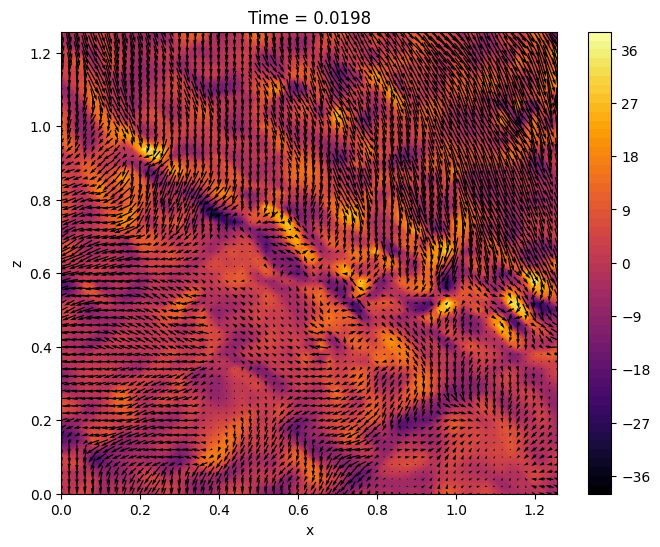

In [102]:
nx, nz = 64, 64

x_points = np.linspace(0.0, 0.4 * np.pi, nx, dtype=np.float64)
y_points = 0.9
z_points = np.linspace(0.0, 0.4 * np.pi, nz, dtype=np.float64)
points = np.zeros((n_points, 3), dtype = np.float64)

for i in range(nx):
    for j in range(nz):
        points[i * nz + j, 0] = x_points[i]
        points[i * nz + j, 1] = y_points
        points[i * nz + j, 2] = z_points[j]

result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)
time_component = 0
result_time = result[time_component]
result_array = np.array(result_time)

ux = np.zeros((nx, nz), dtype=np.float64)
uz = np.zeros((nx, nz), dtype=np.float64)

for i in range(nx):
    for j in range(nz):
        ux[i, j] = result_array[i * nz + j, 0]
        uz[i, j] = result_array[i * nz + j, 2]

dx = x_points[1] - x_points[0]
dz = z_points[1] - z_points[0]

# print(ux.shape)

dudz = np.gradient(ux, dz, axis = 0)
dwdx = np.gradient(uz, dx, axis = 1)

wy = dudz - dwdx
print(wy.shape)
plt.figure(figsize=(8,6))
contour = plt.contourf(x_points, z_points, wy, levels=50, cmap='inferno')
plt.colorbar(contour)
plt.xlabel("x")
plt.ylabel("z")
plt.title(f"Time = {time:.4f}")
plt.quiver(x_points, z_points, ux, uz, color='black', scale=30, pivot='middle')  # 속도 벡터


In [ ]:
time_range = np.arange(0.0002, 0.02, 0.0002)  # 시간 범위
nx, nz = 64, 64
n_points = nx * nz

x_points = np.linspace(0.0, 0.4 * np.pi, nx, dtype=np.float64)
y_points = 0.9
z_points = np.linspace(0.0, 0.4 * np.pi, nz, dtype=np.float64)

points = np.zeros((n_points, 3), dtype=np.float64)
for i in range(nx):
    for j in range(nz):
        points[i * nz + j, 0] = x_points[i]
        points[i * nz + j, 1] = y_points
        points[i * nz + j, 2] = z_points[j]

frames_dir = "frames_wy"
os.makedirs(frames_dir, exist_ok=True)

for t_index, time in enumerate(time_range):
    result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)
    if nx >= 2 and nz >= 2:

        time_component = 0
        result_time = result[time_component]
        result_array = np.array(result_time)

        ux = np.zeros((nx, nz), dtype=np.float64)
        uz = np.zeros((nx, nz), dtype=np.float64)

        for i in range(nx):
            for j in range(nz):
                ux[i, j] = result_array[i * nz + j, 0]
                uz[i, j] = result_array[i * nz + j, 2]

        dx = x_points[1] - x_points[0]
        dz = z_points[1] - z_points[0]

        dudz = np.gradient(ux, dz, axis=0)
        dwdx = np.gradient(uz, dx, axis=1)
        wy = dudz - dwdx

        fig, ax = plt.subplots(figsize=(7, 7), dpi=67)
        contour = ax.contourf(x_points, z_points, wy.T, levels=50, cmap='inferno')  # .T로 전치
        plt.colorbar(contour, ax=ax)
        ax.quiver(x_points, z_points, ux.T, uz.T, color='black', scale=30, pivot='middle')  # 속도 벡터
        plt.title(f"Vorticity Field (Time = {time:.4f})")
        plt.xlabel("x")
        plt.ylabel("z")
        plt.gca().set_aspect('equal', adjustable='box')

        frame_path = f"{frames_dir}/frame_{t_index:03}.png"
        plt.savefig(frame_path)
        plt.close()

frame_files = sorted([f"{frames_dir}/{file}" for file in os.listdir(frames_dir) if file.endswith(".png")])
first_frame = cv2.imread(frame_files[0])
height, width, _ = first_frame.shape
video = cv2.VideoWriter("vorticity_video.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 10, (width, height))

for frame_file in frame_files:
    frame = cv2.imread(frame_file)
    video.write(frame)

video.release()